# Gradient Descent with Applications to Linear Regression


Gradient descent is a supervised iterative optimization algorithm with the goal to find a local min (or global, sometimes) for the function $f(x)$. Here, $f$ is a smooth real valued function and $x \in \mathbb{R}^n$. Gradient descent is one of the simplest and widely used algorithms in machine learning, mainly because it can be applied to any function to optimize it.

To obtain the new values of $x$, we subtract the gradient of the function and multiply it by $a_k$, this is the learning rate. $a_k$ represents the step size, for each iteration of the algorithm. Therefore, we can represent the process as the following:

$$x_{k+1}=x_k-\alpha_k\nabla f(x_k)$$

We can now observe the gradient descent of an example function below with the gradient:

$$f(x,y)=3(x-4)^2 + y^2$$

$$\nabla f(x,y)=\begin{bmatrix}6(x-4)\\2y\\\end{bmatrix}$$

For this notebook we will need the following packages:
* Plots [documentation](http://docs.juliaplots.org/latest/)
* DataFrames [documentation](https://juliadata.github.io/DataFrames.jl/stable/)

In [36]:
using Plots
using Random
using CSV # using Dataframes
using DataFrames
theme(:dark)

# Creating sample function
f(x,y) = 3(x-4)^2 + y^2
∇f(x,y) = [6*(x-4), 2y];

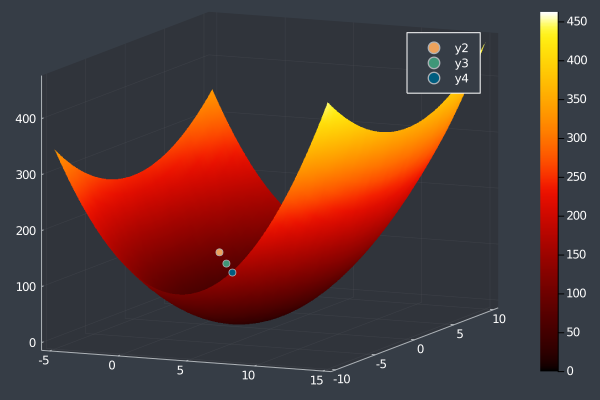

In [37]:
x = -5:0.5:15
y = -10:0.5:10

plot(x,y,f, st=:surface)
scatter!([(x0[1], x0[2], f(x0[1], x0[2]))])
scatter!([(x1[1], x1[2], f(x1[1], x1[2]))])
scatter!([(x2[1], x2[2], f(x2[1], x2[2]))])

We will visualize the plot of $f(x,y)$ in contour plot form instead of the 3-dimensional plot above so we can better demonstrate the gradient descent algorithm for our learning purposes.

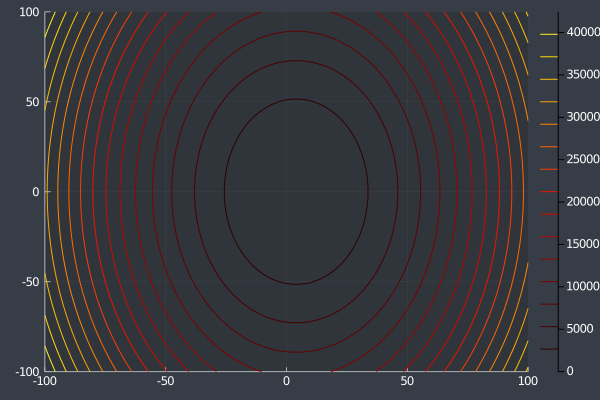

In [38]:
x = -100:0.5:100
y = -100:0.5:100

p1 = contour(x, y, f)
plot(p1, legend = false)

We can start by selecting a point to begin the iterations at, which would be the point $(-1,4)$ here.

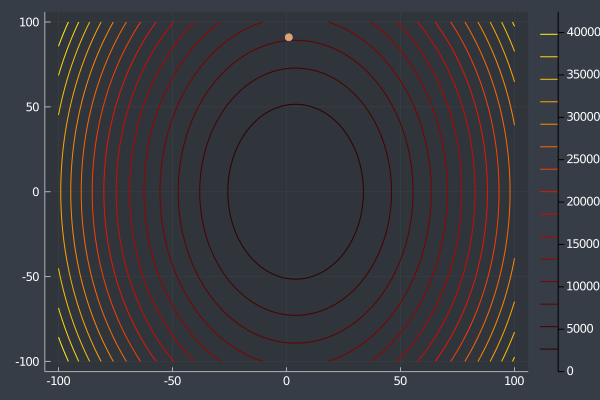

In [39]:
# starting point
x0 = [-1,4]
scatter!([f(x0[1], x0[2])])

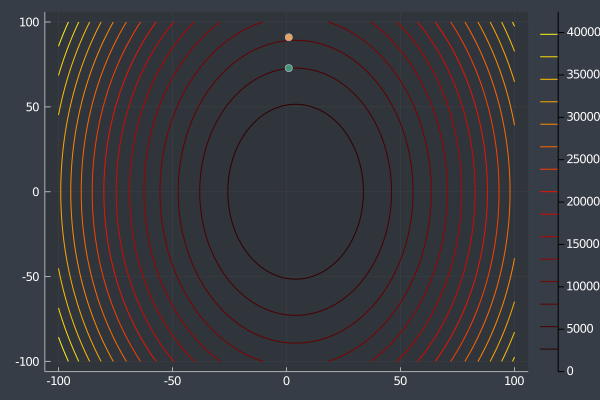

In [40]:
# first iteration
x1 = x0 - 0.02*∇f(x0[1], x0[2])
scatter!([f(x1[1], x1[2])])

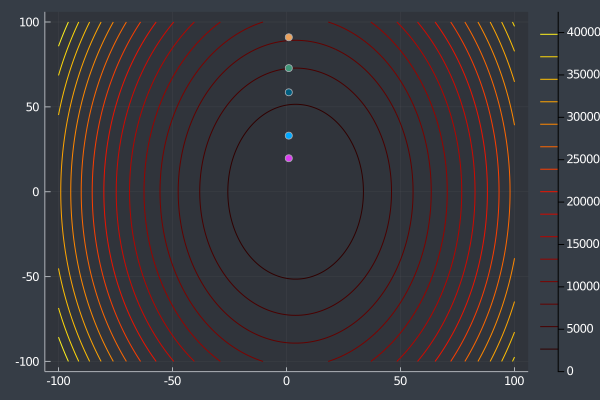

In [41]:
# 2nd, 3rd, 4th iterations
x2 = x1 - 0.02*∇f(x1[1], x1[2])
scatter!([f(x2[1], x2[2])])

x3 = x2 - 0.05*∇f(x2[1], x2[2])
scatter!([f(x3[1], x3[2])])

x4 = x3 - 0.05*∇f(x3[1], x3[2])
scatter!([f(x4[1], x4[2])])

## Application to Linear Regression

The main goal linear regression is to find the best line $y = wx + b$ that fits the data. One way we can do this is by defining a cost/error function through the Mean Squared Error (MSE) function. In this case, we have an intercept and slope, which we do not know ahead of time, but we want to find. Therefore, we can define a function of $w$ and $b$ which is the average squared error:
$$MSE(w,b) = \frac{1}{N} \sum^N_{i=1}(y_i-(wx_i+b))^2$$

We can now apply gradient descent in the form of partial derivatives to our MSE function:

$$\nabla MSE(w,b) = \begin{bmatrix}
\frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b))x_i \\
\frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b))
\end{bmatrix}$$

After solving for $w$ and $b$, we arrive at the following optimization functions:

$$w^{k+1} = w^k - \alpha(\frac{-2}{N} \sum^N_{i=1}x_i(y_i-(wx_i+b)))$$
$$b^{b+1} = b^k - \alpha(\frac{-2}{N} \sum^N_{i=1}(y_i-(wx_i+b)))$$

Now we can apply those functions using the follow set of advertising data to predict sales.

In [42]:
data = DataFrame!(CSV.File("Advertising.csv"))

,Column1,TV,Radio,Newspaper,Sales
,Int64,Float64,Float64,Float64,Float64
1,1,230.1,37.8,69.2,22.1
2,2,44.5,39.3,45.1,10.4
3,3,17.2,45.9,69.3,9.3
4,4,151.5,41.3,58.5,18.5
5,5,180.8,10.8,58.4,12.9
6,6,8.7,48.9,75.0,7.2
7,7,57.5,32.8,23.5,11.8
8,8,120.2,19.6,11.6,13.2
9,9,8.6,2.1,1.0,4.8


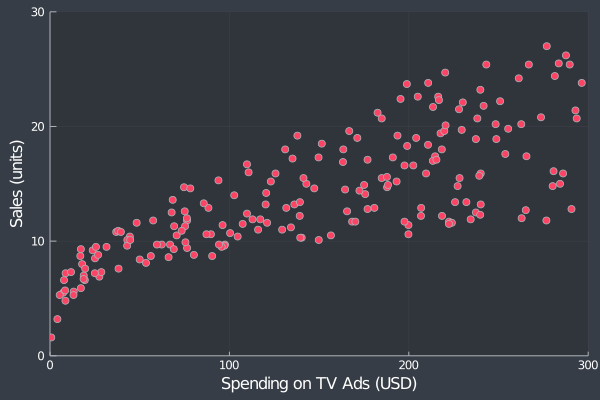

In [43]:
x_data = data.TV
y_data = data.Sales

data_tuples = [x for x in zip(x_data, y_data)]

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0, 30),
        xaxis = "Spending on TV Ads (USD)",
        yaxis = "Sales (units)",
        legend = false)

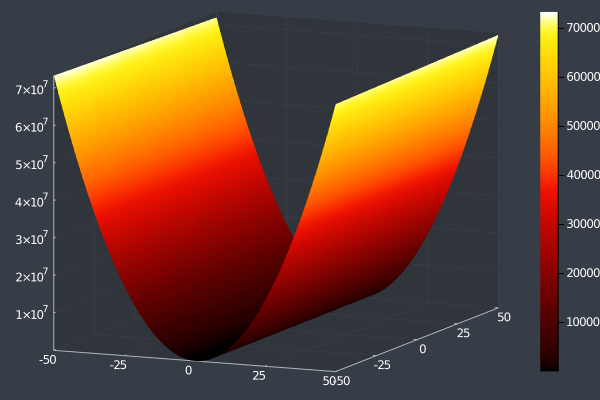

In [44]:
# MSE cost function
C(w, b) = (1/length(x_data)) * sum([(y_data[i] - (w*x_data[i] + b))^2 for i = 1:length(x_data)])

w = -50:0.5:50
b = -50:0.5:50

plot(w, b, C, st = :surface)

### Batch Gradient Descent

In Batch Gradient Descent, all the training data is taken into consideration to take a single step. We take the average of the gradients of all the training examples and then use that mean gradient to update our parameters. So that’s just one step of gradient descent in one epoch.

**Upsides**
- Fewer updates to the model means this variant of gradient descent is more computationally efficient than stochastic gradient descent.
- The decreased update frequency results in a more stable error gradient and may result in a more stable convergence on some problems.
- The separation of the calculation of prediction errors and the model update lends the algorithm to parallel processing based implementations.

**Downsides**
- The more stable error gradient may result in premature convergence of the model to a less optimal set of parameters.
- The updates at the end of the training epoch require the additional complexity of accumulating prediction errors across all training examples.
- Commonly, batch gradient descent is implemented in such a way that it requires the entire training dataset in memory and available to the algorithm.
- Model updates, and in turn training speed, may become very slow for large datasets.

In [45]:
function batch_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    w = w - α*(-2/N)*sum([x_data[i]*(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    b = b - α*(-2/N)*sum([(y_data[i] - (w*x_data[i] + b)) for i = 1:N])
    
    return w, b
end

function batch_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i==1
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==100
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==1000
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==10000
            println("Epoch ", i, " with cost ", C(w,b))
        end
    end
    
    return w,b
end

batch_train (generic function with 1 method)

Epoch 1 with cost 58.586909599170966


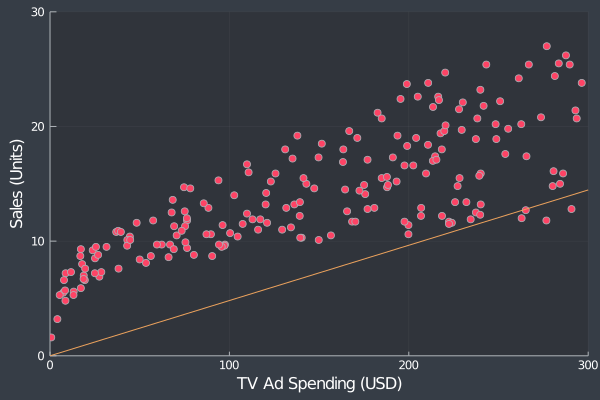

In [56]:
w,b = batch_train(x_data, y_data, 0.0, 0, 0.00001, 1)

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)
plot!(x-> x*w + b,
        xlim = (0,300),
        ylim = (0,30),
        legend = false)

Epoch 1 with cost 58.586909599170966
Epoch 100 with cost 23.026278283646004
Epoch 1000 with cost 22.912694162324474
Epoch 10000 with cost 21.83204068666527


w after 10,000 iterations: 0.08148498895034978
b after 10,000 iterations: 0.3475471956001144


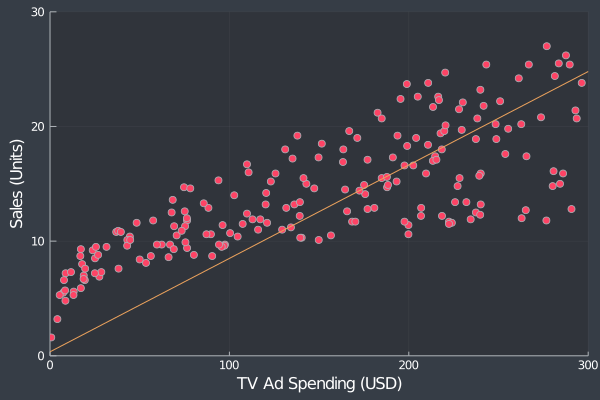

In [57]:
w, b = batch_train(x_data, y_data, 0.0, 0, 0.00001, 10000)
println("\n\nw after 10,000 iterations: ", w)
println("b after 10,000 iterations: ", b)

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)
plot!(x-> x*w + b,
        xlim = (0,300),
        ylim = (0,30),
        legend = false)

### Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step. We do the following steps in one epoch for SGD:

1. Take an example
2. Feed it to Neural Network
3. Calculate it’s gradient
4. Use the gradient we calculated in step 3 to update the weights
5. Repeat steps 1–4 for all the examples in training dataset

Since we are considering just one example at a time the cost will fluctuate over the training examples and it will not necessarily decrease. But in the long run, you will see the cost decreasing with fluctuations.

**Upsides**
- The frequent updates immediately give an insight into the performance of the model and the rate of improvement.
- This variant of gradient descent may be the simplest to understand and implement, especially for beginners.
- The increased model update frequency can result in faster learning on some problems.
- The noisy update process can allow the model to avoid local minima (e.g. premature convergence).

**Downsides**
- Updating the model so frequently is more computationally expensive than other configurations of gradient descent, taking significantly longer to train models on large datasets.
- The frequent updates can result in a noisy gradient signal, which may cause the model parameters and in turn the model error to jump around (have a higher variance over training epochs).
- The noisy learning process down the error gradient can also make it hard for the algorithm to settle on an error minimum for the model.

In [50]:
function stochastic_gradient_descent(x_data, y_data, w, b, α)
    N = length(x_data)
    
    i = rand([k for k = 1:N])
    
    w = w - α*(-2/N)*([x_data[i]*(y_data[i] - (w*x_data[i] + b))])
    b = b - α*(-2/N)*([(y_data[i] - (w*x_data[i] + b))])
    
    return w, b
end

function stochastic_train(x_data, y_data, w, b, α, epochs)
    for i = 1:epochs
        w, b = batch_gradient_descent(x_data, y_data, w, b, α)
        
        if i==1
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==100
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==1000
            println("Epoch ", i, " with cost ", C(w,b))
        end
        
        if i==10000
            println("Epoch ", i, " with cost ", C(w,b))
        end
    end
    
    return w,b
end

stochastic_train (generic function with 1 method)

Epoch 1 with cost 58.586909599170966
Epoch 100 with cost 23.026278283646004
Epoch 1000 with cost 22.912694162324474
Epoch 10000 with cost 21.83204068666527


w after 10,000 iterations: 0.08148498895034978
b after 10,000 iterations: 0.3475471956001144


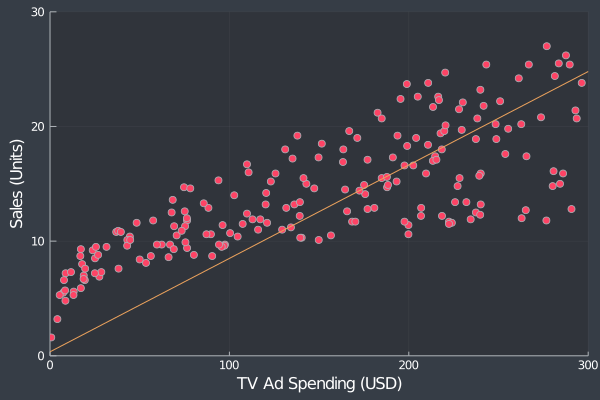

In [58]:
w, b = stochastic_train(x_data, y_data, 0.0, 0, 0.00001, 10000)
println("\n\nw after 10,000 iterations: ", w)
println("b after 10,000 iterations: ", b)

scatter(data_tuples,
        xlim = (0, 300),
        ylim = (0,30),
        xaxis = "TV Ad Spending (USD)",
        yaxis = "Sales (Units)",
        legend = false)
plot!(x-> x*w + b,
        xlim = (0,300),
        ylim = (0,30),
        legend = false)